In [1]:
import seaborn as sns
sns.set(font_scale=1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import FinanceDataReader as fdr

In [ ]:
fdr.DataReader()??

In [6]:
df = fdr.DataReader(symbol='005930',start='2018')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177
2018-01-03,52540,52560,51420,51620,200270,0.011760
2018-01-04,52120,52180,50640,51080,233909,-0.010461
2018-01-05,51300,52120,51200,52120,189623,0.020360
2018-01-08,52400,52520,51500,52020,167673,-0.001919


In [7]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-07-13,58300,58600,58000,58000,10841315,-0.001721
2022-07-14,57500,58200,57400,57500,15067012,-0.008621
2022-07-15,58400,60000,58100,60000,18685583,0.043478
2022-07-18,60600,62000,60500,61900,20832517,0.031667
2022-07-19,61400,61500,60200,60700,7590637,-0.019386


- Open : 시작가
- High : 최고가
- Low : 최저가
- Close : 종가
- Volume : 거래량
- Change : 전일 대비 상승 or 하락

<AxesSubplot:xlabel='Date'>

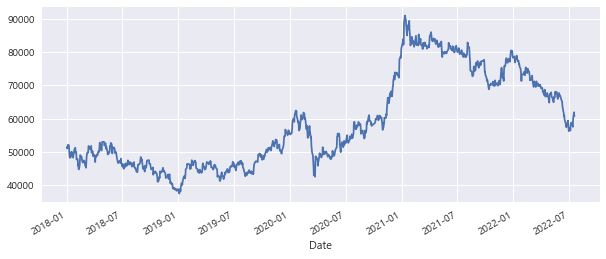

In [8]:
df['Close'].plot(figsize=(10,4))

In [9]:
df_krx = pd.read_csv('krx.csv')

#### 종목명 코드(Symbol) 찾아오기

In [21]:
# Name이 하이브인 row 찾기

df_krx[df_krx['Name'] == '하이브']

# Name이 하이브인 row 찾아서 Symbol 컬럼만 추출
df_krx.loc[df_krx['Name'] == '하이브','Symbol'].tolist()[0]

'352820'

In [29]:
def item_code_by_item_name(item_name):
    '''
    종목명을 받아 종목코드 반환
    '''
    
    item_code_list = df_krx.loc[df_krx['Name'] == item_name, 'Symbol'].tolist()
    
    if len(item_code_list) > 0:
        return item_code_list[0]
    else:
        return False

In [30]:
# 함수 테스트

item_code_by_item_name('카카오')
item_code_by_item_name('삼성전자')
item_code_by_item_name('네이버')

False

In [31]:
fdr.DataReader(item_code_by_item_name('삼성전자'))

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-05-14,1202,1288,1191,1221,308030,NaN
1998-05-15,1221,1264,1219,1229,231700,0.006552
1998-05-16,1191,1210,1191,1201,124980,-0.022783
1998-05-18,1206,1226,1165,1177,255210,-0.019983
1998-05-19,1163,1171,1118,1138,434310,-0.033135
...,...,...,...,...,...,...
2022-07-13,58300,58600,58000,58000,10841315,-0.001721
2022-07-14,57500,58200,57400,57500,15067012,-0.008621
2022-07-15,58400,60000,58100,60000,18685583,0.043478


In [36]:
# item_code_by_item_name('삼성전자' : 종목명으로 종목번호 가져오기

def find_item_list(item_name, year=2020):
    '''
    종목명과 시작일자를 넘겨주면 일별시세 반환
    연도가 입력되지 않으면 2020년부터 시작
    '''
    
    item_code = item_code_by_item_name(item_name)
    
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [37]:
find_item_list('삼성전자')

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2022-07-13,58300,58600,58000,58000,10841315,-0.001721
2022-07-14,57500,58200,57400,57500,15067012,-0.008621
2022-07-15,58400,60000,58100,60000,18685583,0.043478


In [38]:
find_item_list('삼성전자',2021)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691
2021-01-05,81600,83900,81600,83900,35335669,0.010843
2021-01-06,83300,84500,82100,82200,42089013,-0.020262
2021-01-07,82800,84200,82700,82900,32644642,0.008516
2021-01-08,83300,90000,83000,88800,59013307,0.071170
...,...,...,...,...,...,...
2022-07-13,58300,58600,58000,58000,10841315,-0.001721
2022-07-14,57500,58200,57400,57500,15067012,-0.008621
2022-07-15,58400,60000,58100,60000,18685583,0.043478


In [39]:
find_item_list('삼성',2021)

False

In [40]:
stock_daily = find_item_list('하이브')
stock_daily

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-10-15,267300,347490,250965,255420,6557212,NaN
2020-10-16,250469,250469,197010,198495,4504395,-0.222868
2020-10-19,196515,200475,185129,187110,1977996,-0.057357
2020-10-20,188100,191565,174240,180675,1811616,-0.034392
2020-10-21,178695,183645,175230,177210,1658643,-0.019178
...,...,...,...,...,...,...
2022-07-13,156000,161000,155000,158500,131005,0.016026
2022-07-14,156500,165000,156500,163500,231449,0.031546
2022-07-15,163500,164500,156000,156500,179481,-0.042813


<AxesSubplot:xlabel='Date'>

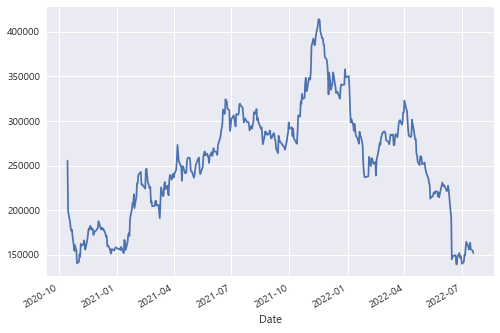

In [41]:
stock_daily['Close'].plot()

<AxesSubplot:xlabel='Date'>

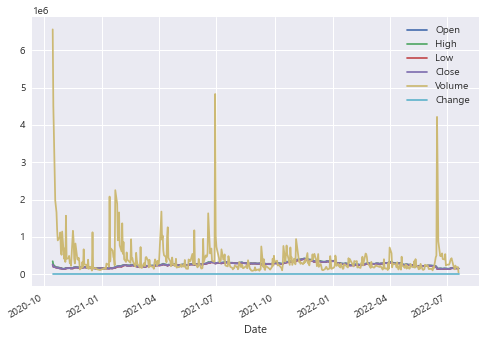

In [43]:
stock_daily.plot()

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

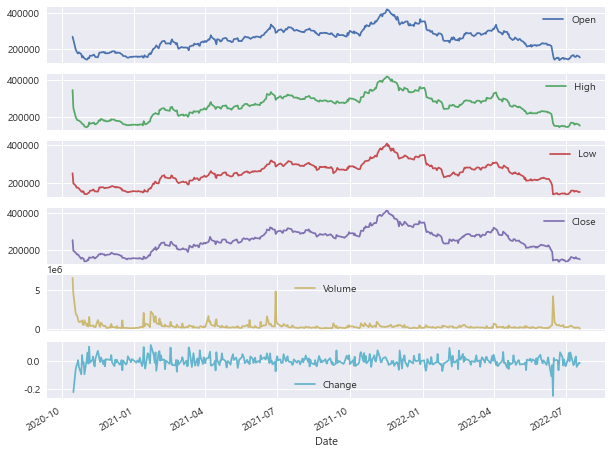

In [45]:
stock_daily.plot(subplots=True, figsize=(10,8))

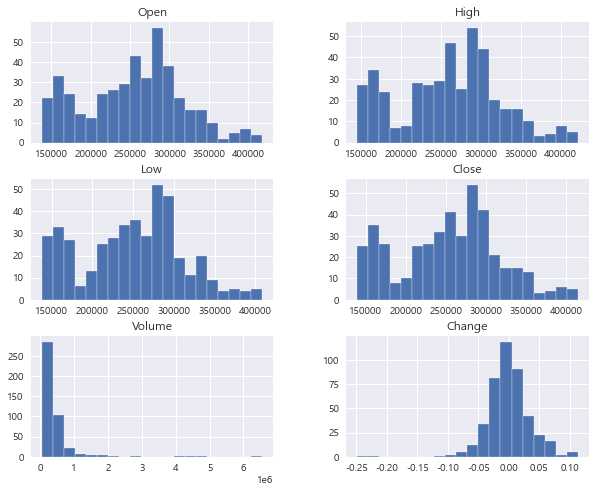

In [47]:
stock_daily.hist(figsize=(10,8), bins=20);

<AxesSubplot:xlabel='Date'>

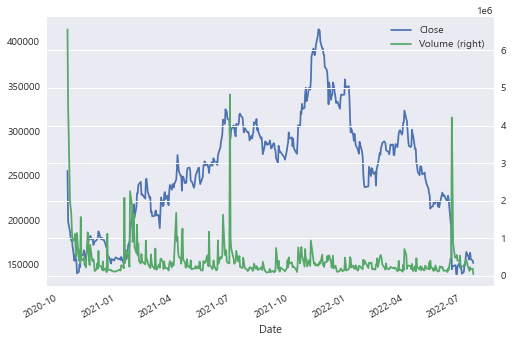

In [49]:
stock_daily[['Close','Volume']].plot(secondary_y='Volume')

In [50]:
1e6 # 10의 6승

1000000.0

In [51]:
stock_daily.describe()

,Open,High,Low,Close,Volume,Change
count,436.000000,436.000000,436.000000,436.000000,4.360000e+02,435.000000
mean,255102.261468,260970.412844,249305.433486,254481.399083,4.186412e+05,-0.000527
std,63165.439299,64108.385288,62182.851359,63128.472461,5.626357e+05,0.035924
min,138000.000000,145035.000000,138000.000000,139500.000000,4.512100e+04,-0.248705
25%,212850.000000,219656.250000,206291.000000,210746.250000,1.849492e+05,-0.019840
50%,261000.000000,265000.000000,254465.000000,260250.000000,2.713630e+05,0.000000
75%,295750.000000,302000.000000,289625.000000,296250.000000,4.316625e+05,0.015599
max,418000.000000,421500.000000,408500.000000,414000.000000,6.557212e+06,0.112717


### 특정 회사 종가 가져오기

In [52]:
stock_list = [
    ['삼성전자','005930'],
    ['SK하이닉스','000660'],
    ['현대차','005380'],
    ['셀트리온','068270'],
    ['LG화학','051910'],
    ['POSCO','005490'],
    ['삼성물산','028260'],
    ['NAVER','035420'],
]

df_list = [fdr.DataReader(code, '2021-01-01', '2021-12-31')['Close'] for name, code in stock_list]

In [ ]:
list1 = []
for name, code in stock_list:
    list1.append(fdr.DataReader(code, '2021-01-01', '2021-12-31')['Close'])

In [53]:
len(df_list)

8

In [54]:
df = pd.concat(df_list, axis=1)
df

,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,
2021-01-04,83000,126000,207500,341065,889000,273000,144000,293000
2021-01-05,83900,130500,209500,347935,893000,285000,144500,292500
2021-01-06,82200,131000,203000,346954,890000,280000,139500,290000
2021-01-07,82900,134500,206000,350880,962000,291000,145000,289500
2021-01-08,88800,138000,246000,360204,999000,294500,151000,312000
...,...,...,...,...,...,...,...,...
2021-12-24,80500,128000,215500,197278,621000,284000,117000,384000
2021-12-27,80200,126000,213500,200222,627000,281500,117000,380500
2021-12-28,80300,127500,214000,212000,632000,283500,118000,384500


In [55]:
df.columns = [name for name, code in stock_list]

In [56]:
df.head()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2021-01-04,83000,126000,207500,341065,889000,273000,144000,293000
2021-01-05,83900,130500,209500,347935,893000,285000,144500,292500
2021-01-06,82200,131000,203000,346954,890000,280000,139500,290000
2021-01-07,82900,134500,206000,350880,962000,291000,145000,289500
2021-01-08,88800,138000,246000,360204,999000,294500,151000,312000


<AxesSubplot:xlabel='Date'>

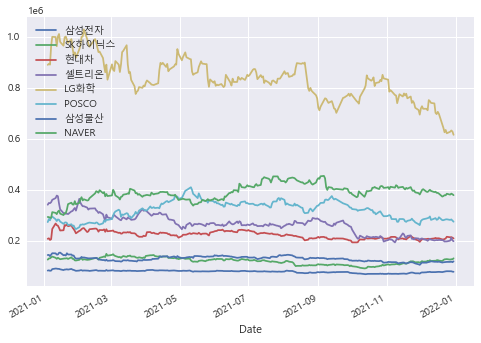

In [57]:
df.plot()

<AxesSubplot:xlabel='Date'>

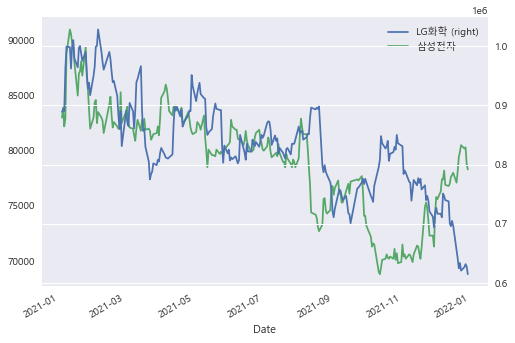

In [58]:
df[['LG화학','삼성전자']].plot(secondary_y='LG화학')

#### 기간 수익률

In [59]:
df2 = df[['삼성전자','LG화학']]

In [61]:
df2

,삼성전자,LG화학
Date,,
2021-01-04,83000,889000
2021-01-05,83900,893000
2021-01-06,82200,890000
2021-01-07,82900,962000
2021-01-08,88800,999000
...,...,...
2021-12-24,80500,621000
2021-12-27,80200,627000
2021-12-28,80300,632000


In [64]:
df_plot = df2 / df2.iloc[0] - 1
df_plot

,삼성전자,LG화학
Date,,
2021-01-04,0.000000,0.000000
2021-01-05,0.010843,0.004499
2021-01-06,-0.009639,0.001125
2021-01-07,-0.001205,0.082115
2021-01-08,0.069880,0.123735
...,...,...
2021-12-24,-0.030120,-0.301462
2021-12-27,-0.033735,-0.294713
2021-12-28,-0.032530,-0.289089


<AxesSubplot:xlabel='Date'>

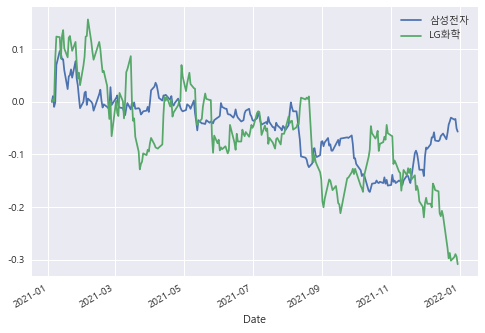

In [65]:
df_plot.plot()

<AxesSubplot:title={'center':'수익률'}, xlabel='Date'>

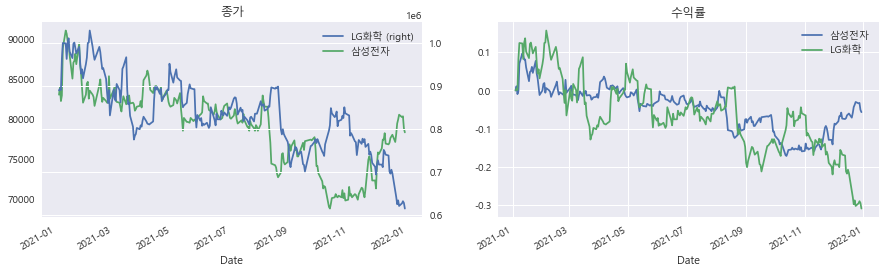

In [75]:
fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(15,4))

df[['LG화학','삼성전자']].plot(secondary_y='LG화학',ax=axes[0], title='종가')

df_plot.plot(ax=axes[1],title='수익률')

### 전체 데이터 프레임 값에 대한 수익률 계산

In [78]:
df_norm = df / df.iloc[0] - 1
df_norm

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2021-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05,0.010843,0.035714,0.009639,0.020143,0.004499,0.043956,0.003472,-0.001706
2021-01-06,-0.009639,0.039683,-0.021687,0.017267,0.001125,0.025641,-0.031250,-0.010239
2021-01-07,-0.001205,0.067460,-0.007229,0.028778,0.082115,0.065934,0.006944,-0.011945
2021-01-08,0.069880,0.095238,0.185542,0.056115,0.123735,0.078755,0.048611,0.064846
...,...,...,...,...,...,...,...,...
2021-12-24,-0.030120,0.015873,0.038554,-0.421582,-0.301462,0.040293,-0.187500,0.310580
2021-12-27,-0.033735,0.000000,0.028916,-0.412951,-0.294713,0.031136,-0.187500,0.298635
2021-12-28,-0.032530,0.011905,0.031325,-0.378418,-0.289089,0.038462,-0.180556,0.312287


<AxesSubplot:xlabel='Date'>

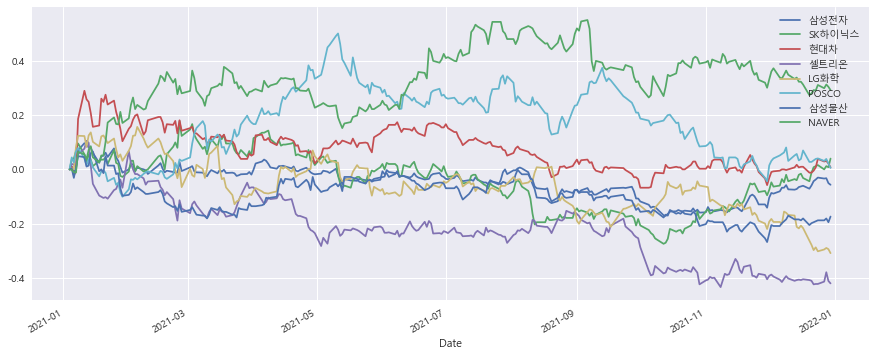

In [82]:
# df_norm 시각화(plot)
df_norm.plot(figsize=(15,6))

In [79]:
# df_norm 기술통계값
df_norm.describe()

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,-0.046318,-0.037737,0.076535,-0.221896,-0.064067,0.167472,-0.101324,0.329063
std,0.058149,0.102756,0.072992,0.121601,0.095075,0.130480,0.069813,0.115432
min,-0.171084,-0.273810,-0.067470,-0.433093,-0.308211,-0.100733,-0.267361,-0.011945
25%,-0.081325,-0.128968,0.009639,-0.297124,-0.127390,0.041667,-0.160590,0.270904
50%,-0.034940,-0.023810,0.077108,-0.223022,-0.065242,0.179487,-0.090278,0.331911
75%,-0.009337,0.035714,0.128916,-0.151440,0.001125,0.266026,-0.048611,0.399317
max,0.096386,0.178571,0.289157,0.105036,0.156355,0.500000,0.065972,0.549488


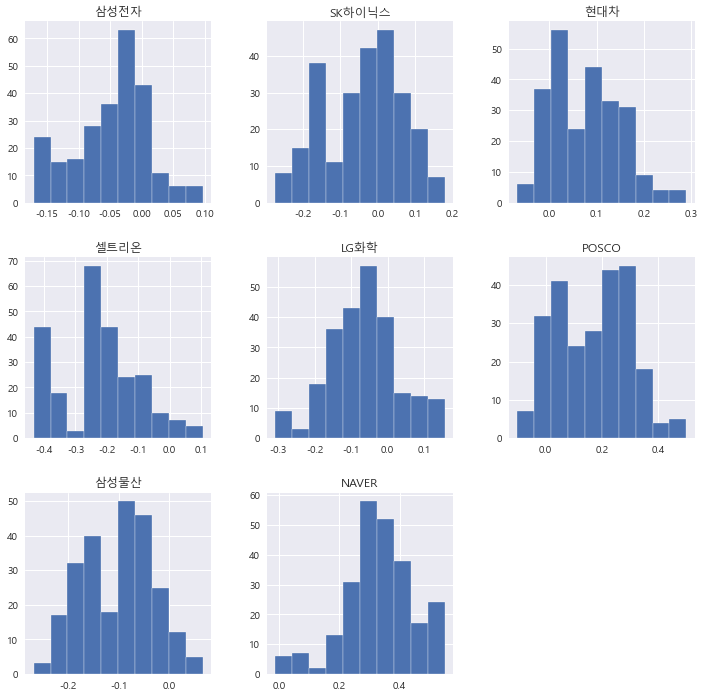

In [84]:
# df_norm 시각화(hist)

df_norm.hist(figsize=(12,12));